In [ ]:
import cv2
import numpy as np
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions


model = MobileNetV2(weights="imagenet")

print("Модель MobileNetV2 загружена")


Модель MobileNetV2 загружена


In [ ]:
video_path = "video.mp4" 

cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Ошибка: не удалось открыть видео")
else:
    print(f"Видео {video_path} успешно открыто")


Видео video.mp4 успешно открыто


In [ ]:
def process_frame(frame, model):
    
    resized_frame = cv2.resize(frame, (224, 224))
    
    img = cv2.cvtColor(resized_frame, cv2.COLOR_BGR2RGB)
    
    img = preprocess_input(np.expand_dims(img.astype(np.float32), axis=0))
    
    preds = model.predict(img)
    label = decode_predictions(preds, top=1)[0][0][1]
    return label


In [15]:
ret, frame = cap.read()
if not ret:
    print("Не удалось считать кадр из видео")
else:
    label = process_frame(frame, model)
    print(f"Предсказание для кадра: {label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 762ms/step
Предсказание для кадра: academic_gown


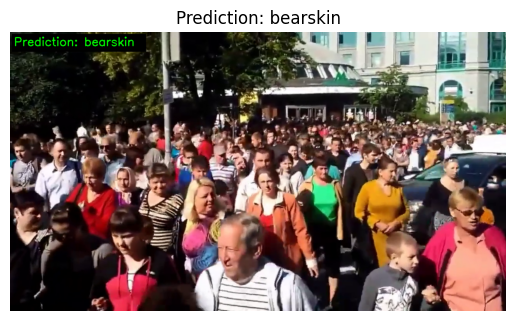

Видео закончилось или ошибка при чтении кадра


In [ ]:
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

while True:
    ret, frame = cap.read()
    if not ret:
        print("Видео закончилось или ошибка при чтении кадра")
        break
    
    label = process_frame(frame, model)

    
    cv2.rectangle(frame, (5, 5), (350, 50), (0, 0, 0), -1)
    cv2.putText(frame, f'Prediction: {label}', (10, 35),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    clear_output(wait=True)  
    plt.imshow(frame_rgb)
    plt.title(f"Prediction: {label}")
    plt.axis('off')
    plt.show()
    
    
    time.sleep(0.03)  
    
    
